# Робота №1. Моделювання кристалічної будови металів або сплавів з точковими дефектами в програмі XMD і візуалізація її в програмі VMD

## Мета роботи
Навчитися будувати ґратки металів або сполук та точкових дефектів кристалічної будови в
програмі XMD для розрахунків методом молекулярної динаміки (МД) і виконувати
візуалізацію трьохвимірної кристалічної будови в програмі VMD.

## Об'єкт дослідження
Кристали металів або сплавів з точковими дефектами.

## Програма проведення експерименту
1. В програмі XMD створити кристал сплаву з ~500-1000 атомів з періодичними граничними умовами (або нанотрубку). Додати вакансію або міжвузловий атом. Матеріал: _Ni-Al_. Використовуємо наведений нижче код для программи ```xmd``` для побудови кристалу.

In [4]:
%%writefile in.xm
read ../pot/nial.txt

box 7 7 7

fill particle 1
1 0.0 0.0 0.0
2 0.5 0.5 0.5

fill align 7 7 7
fill orient 1 0 0  0 1 0  0 0 1
fill go

dtime DTIME

select type 1 #
mass MASS1

select type 2 #
mass MASS2

select box 2.3 2.3 2.3 2.7 2.7 2.7
remove select

fill boundary box 2.7 2.3 1.3 3.2 2.6 1.6
fill particle 1
2 3 2.5 1.5
fill go


select all
scale 2.8863

clamp off
itemp 300

write pdb ./out/exp1.pdb
repeat 100
	cmd 10
	write pdb +./out/exp1.pdb
end

Overwriting in.xm


Релаксуємо кристал. Записати в файл координати атомів на кількох кроках у часі.

In [ ]:
!xmd in.xm > exp1.log

Отримуємо файл координат `pdb`.

In [6]:
%%bash
head ./out/exp1.pdb

REMARK Output from XMD
REMARK (c) 1996, Center for Materials Simulation, University of Connecticut
REMARK Run 0  Step 0  09/15/2017   14:33:48
REMARK  Number of Atoms = 686
HETATM     11            1       0.000   0.000   0.000
HETATM     22            1       1.443   1.443   1.443
HETATM     31            1       0.000   0.000   2.886
HETATM     42            1       1.443   1.443   4.329
HETATM     51            1       0.000   0.000   5.773
HETATM     62            1       1.443   1.443   7.216


За допомогою програмного додатку `vmd` візуалізовуємо кристал:

In [ ]:
!vmd ./out/exp1.pdb

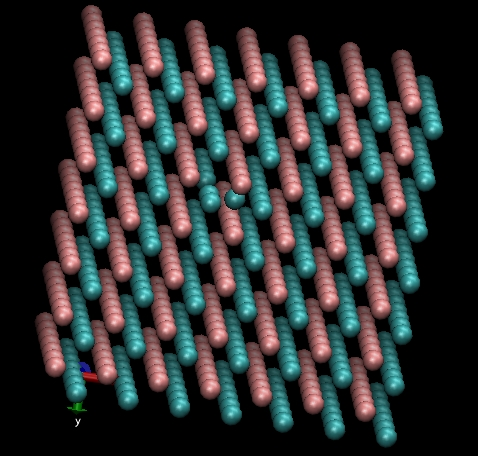